In [1]:
################## imports  ####################################
import urllib.request
import pandas as pd
import json
import os
import networkx as nx
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import nltk
import os
from tqdm.notebook import tqdm
import json
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
from matplotlib.lines import Line2D
import ast
import nltk 
import nltk, re, pprint
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image 
from stop_words import get_stop_words
from nltk.corpus import stopwords
import pprint
from nltk import word_tokenize
import string
import csv
import operator
import numpy.random
import statistics
import ast
import math
from bs4 import BeautifulSoup
from collections import Counter
from community import community_louvain
import itertools
from fa2 import ForceAtlas2
import colorcet as cc
from sklearn.datasets import make_blobs
import random


### Get data

In [2]:
# Load Graph
CG = nx.read_gpickle("/Users/lx1023696171/Documents/0_DTU_study/02825 Social graphs and interactions/Project/11.23/Project/Data/final_graph.gpickle")

## Answer:


In [3]:
def check_nodes(G):
    d_out = dict(G.out_degree())
    key0_out = [k for k, v in d_out.items() if v == 0]
    # get the heros'name-list that out-degree is 0

    d_in = dict(G.in_degree())
    key0_in = [k for k, v in d_in.items() if v == 0]
    # get the heros'name-list that in-degree is 0

    nodesDegree_0 = []
    for i in key0_out:
        if i in key0_in:
            nodesDegree_0.append(i)
    G.remove_nodes_from(nodesDegree_0)
    return G

CG2=check_nodes(CG)

CG_un = nx.to_undirected(CG)

partitionC = community_louvain.best_partition(CG_un)

In [4]:
count = 0
for com in set(partitionC.values()) :
    count = count + 1
count
print(f"We got {count} communities form 'louvain communities'" )
communities_numbers = count

We got 18 communities form 'louvain communities'


### Draw the visualizesion of communities

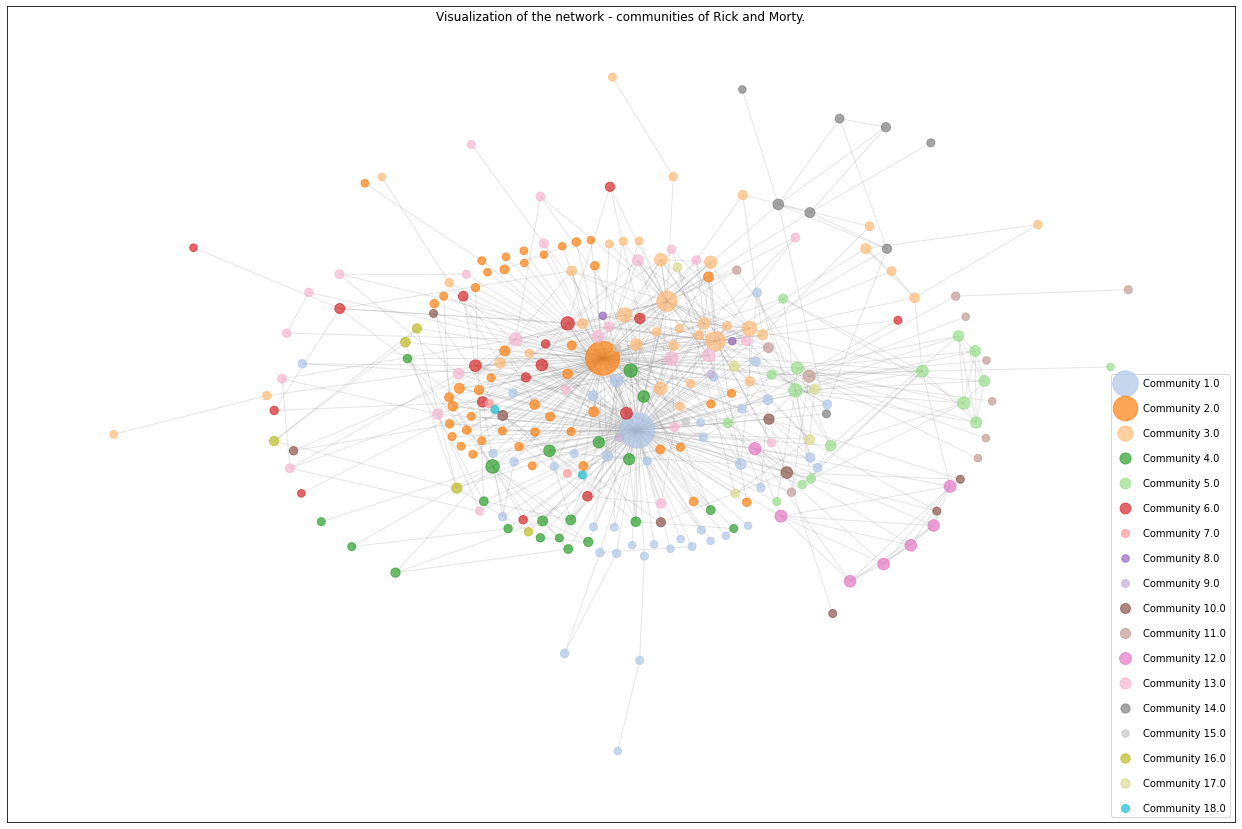

In [5]:
# plot network
fig, ax = plt.subplots(figsize=(22, 15))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.0,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=-1,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(CG_un, pos=None, iterations=2000)
# pos = nx.kamada_kawai_layout(CG_un)  # For some versions that can't install fa2

import seaborn as sns
# create a random RMG-color list
blobs, labels = make_blobs(n_samples=1000, centers=25, center_box=(-100, 100))
P = sns.color_palette("tab20", 20).as_hex()

#drawing
d = dict(nx.degree(CG_un))
nodeSize=[v for v in d.values()]

count = 0.

for com in set(partitionC.values()) :
    count = count + 1.
    node_list = [nodes for nodes in partitionC.keys()
                                if partitionC[nodes] == com]
    list_nodes = node_list


    nodeSize_list=[]
    for node_ in node_list:
      nodeSize = (dict(CG_un.degree())[node_])*7+50
      nodeSize_list.append(nodeSize)
      
    lable_ = "Community {}".format(str(count))
    nx.draw_networkx_nodes(CG_un, pos, list_nodes,alpha = 0.7 ,node_size = nodeSize_list, node_color=P[int(count)],label=lable_)
 

nx.draw_networkx_edges(CG_un, pos, alpha=0.2, edge_color = 'grey')

plt.legend(labelspacing = 1.5)
plt.title('Visualization of the network - communities of Rick and Morty.', pad=-14)

plt.show()

In [83]:
Characters = nx.read_gpickle("../Data/characters.pickle")

### Compare the original species and the communities creating by louvain method

In [8]:
# Creat a dict, keys are name, values are community number
node_list_all = []
Communitylist = []
count = 0
for com in set(partitionC.values()) :
    count = count + 1.
    node_list = [nodes for nodes in partitionC.keys()
                                if partitionC[nodes] == com]
    node_list_all = node_list_all + node_list
    
    Community_number = count
    
    for node in node_list:
        Communitylist.append(Community_number)

CommunityDict = {node_list_all[i]: Communitylist[i] for i in range(len(node_list_all))}

In [9]:
# Handle the data in dataframe 'Character', deleting the nodes(names) that without link to other nodes.
Characters_less = list(CommunityDict.keys()) 
Characters_more = Characters["Name"]
DeleteList = []
for name in Characters_more:
    if name not in Characters_less:
        DeleteList.append(name)

CharactersLess = Characters
for name_ in DeleteList:
    CharactersLess = CharactersLess[CharactersLess.Name != name_]

len(CharactersLess)

260

In [10]:
communityOrder_list = []
for name__ in list(CharactersLess["Name"]):
    communityOrder = int(CommunityDict[name__])
    communityOrder_list.append(communityOrder)

CharactersLess["community order"] = communityOrder_list

In [11]:
SpeciesList = list(CharactersLess["Species"])
countSpecies = list( dict.fromkeys(SpeciesList))
print(f'There are {len(countSpecies)} species in our characters dataframe of rick and morty. They are {countSpecies}')

SpeciesList_less = list((dict.fromkeys(SpeciesList)).keys())

There are 9 species in our characters dataframe of rick and morty. They are ['Human', 'Alien', 'Humanoid', 'unknown', 'Poopybutthole', 'Mythological Creature', 'Animal', 'Cronenberg', 'Robot']


In [14]:
specieOrder_list = []
for i in range(len(CharactersLess)):
    if list(CharactersLess["Species"])[i] == SpeciesList_less[0]:
        Character_specieOrder = 1
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[1]:
        Character_specieOrder = 2
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[2]:
        Character_specieOrder = 3
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[3]:
        Character_specieOrder = 4
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[4]:
        Character_specieOrder = 5
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[5]:
        Character_specieOrder = 6
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[6]:
        Character_specieOrder = 7
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[7]:
        Character_specieOrder = 8
    elif list(CharactersLess["Species"])[i] == SpeciesList_less[8]:
        Character_specieOrder = 9

    specieOrder_list.append(Character_specieOrder)

CharactersLess['species order'] = specieOrder_list
CharactersLess

,Name,Species,Status,ImageUrl,LastKnownLocation,Wikitext,community order,species order
0,Rick Sanchez,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...",b'{{SimilarName|Rick Sanchez (C-137)|[[Rick (d...,1,1
1,Morty Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...",b'{{SimilarName|the main character we follow t...,2,1
2,Summer Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...",b'{{for|other versions of Summer Smith|Summer ...,3,1
3,Beth Smith,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...",b'{{Character\n|name = Beth Smith\n|image = Be...,3,1
4,Adjudicator Rick,Human,Dead,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Citadel of Ricks', 'url': 'https://r...","b""{{Character|image = AdjudicatorRick.PNG|spec...",4,1
...,...,...,...,...,...,...,...,...
282,Priest Witherspoon,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...","b""{{Stub}}\n{{Character\n|image=[[File:Priest_...",14,1
283,Richard,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...","b""{{Stub}}\n{{Character\n|image=[[File:Richard...",14,1
284,Running Bird,Human,Alive,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Earth (Replacement Dimension)', 'url...","b""{{Stub}}\n{{Character\n|image=Running_Bird.p...",14,1
286,Miles Knightly,Alien,Dead,https://rickandmortyapi.com/api/character/avat...,"{'name': 'Heist-Con', 'url': 'https://rickandm...",b'{{Stub}}\n{{Character\n|name = Mile...,1,2


In [69]:
x = list(CharactersLess['species order'])
xtick = list(range(1,max(x)+1))
aaa= (xtick,[str(i) for i in xtick])
xline = [x - 0.5 for x in xtick]
xtick

[1, 2, 3, 4, 5, 6, 7, 8, 9]

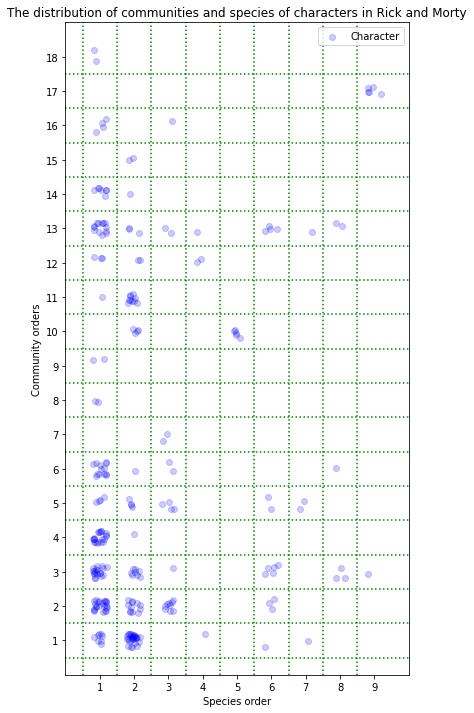

In [81]:
x = list(CharactersLess['species order'])
y = list(CharactersLess['community order'])

# Add a random numer for each node to observe the clustering
x_forPlot = []
for i in range(len(x)):
    number_x  = x[i] + random.uniform(-0.2, 0.2)
    x_forPlot.append(number_x)

y_forPlot = []
for j in range(len(x)):
    number_y  = y[j] + random.uniform(-0.2, 0.2)
    y_forPlot.append(number_y)
      
# Plotting
colors = "blue"
plt.figure(figsize=(12,12))
xtick = list(range(1,max(x)+1))
xline = [x - 0.5 for x in xtick]
ytick = list(range(1,max(y)+1))
yline = [y - 0.5 for y in ytick]
for numberx in xline:
    plt.axvline(x = numberx, color ="green", linestyle =":")
for numbery in yline:
    plt.axhline(y = numbery, color ="green", linestyle =":")

plt.xlim((0,max(x)+1))
plt.ylim((0,max(y)+1))
plt.scatter(x_forPlot, y_forPlot, c=colors, alpha=0.2, label='Character')
plt.ylabel('Community orders',fontsize=10)
plt.xlabel('Species order',fontsize=10)
plt.legend()
plt.title('The distribution of communities and species of characters in Rick and Morty')
plt.xticks(list(range(1,max(x)+1)),[str(i) for i in range(1,max(x)+1)])
plt.yticks(list(range(1,max(y)+1)),[str(j) for j in range(1,max(y)+1)])
plt.gca().set_aspect(1)

From the scatter plot above, we can see that, for each community, the nodes(characters) are mostly concentrated in one or a few fixed species. For example, Community 1 mainly gather in species 1 and species 2, Community 10 mainly concentrated in species 2 and species 5, and Community 17 mainly concentrated in species 9. However, for each species, the concentration of specific communities is not obvious. 

We used 'community_louvain.best_partition' to create communites. Its internal principles come from Louvain method. The Louvain method generally consists of two steps. To create communities, grab nodes in denser areas of the network. Next, Defining a network from the communities found in step 1. The above two steps are repeated until no further reassignments of communities are possible. So when we using it to create the communities, it get communities from the nodes that connections are relatively dense. So the distrubution for each community is easy to be in a few species. 

### Wordcloulds for each community (create by louvain method)

In [18]:
# Get the single words for every character page.
tokens_list = []
for i in range(len(CharactersLess)):
  try:
    Str__ = str(list(CharactersLess["Wikitext"])[i])
    wikitext_1 = Str__ .replace("\\n", " ")
    wikitext_2 = wikitext_1.replace("\'", " ")
    wikitext_3 = wikitext_2.replace("\\u", " ")
    wikitext_4 = wikitext_3.replace("xe2x80x93", " ")
    
    # Remove all punctuation from your list of tokens
    text = wikitext_4.translate(str.maketrans('', '', string.punctuation))
    # Set everything to lowercase
    text = text.lower()
    # Divide the whole string into words
    tokens = word_tokenize(text)

    # Delete the stopwords in the text
    from stop_words import get_stop_words
    from nltk.corpus import stopwords

    stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
    nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
    stop_words.extend(nltk_words)
    tokens_ = []
    for words in tokens:
        if not words in stop_words:
            tokens_.append(words)

    # Remove the words that too short or too long
    tokens_1 = []
    for i in range(len(tokens_)):
        if 2 < len(tokens_[i]) <12 :
            tokens_1.append(tokens_[i])

    tokens_list.append(tokens_1)
    
  
  except:
    print(f'{i} The {CharactersLess["Name"][i]} failed.')
    tokens_list.append(['-'])
     

  # Characters["Wiki text tokens"] = WikiText_tokens

CharactersLess['token list'] = tokens_list

In [19]:
# Creat a communite data frame. One row shows informations of one community.

# Get names for each community
comm_numbers_list = range(1, communities_numbers+1)
community_names_list = []
for i in range(len(comm_numbers_list)):
  namesList = list(CharactersLess.loc[CharactersLess['community order'] == float(comm_numbers_list[i]), 'Name'])
  community_names_list.append(namesList )

# Get tokens for each community
community_tokens_list = []
for i in range(len(comm_numbers_list)):
  tokensList = list(CharactersLess.loc[CharactersLess['community order'] == float(comm_numbers_list[i]), 'token list'])
  community_tokens = []
  for i in range(len(tokensList)):
      community_tokens = community_tokens + tokensList[i]
  community_tokens_list.append(community_tokens)

title_column = {"community order":comm_numbers_list,
                "names":community_names_list,
                "tokens":community_tokens_list,
                }
Communities = pd.DataFrame(title_column)
Communities

,community order,names,tokens
0,1,"[Rick Sanchez, Albert Einstein, Alien Googah, ...","[sanchez, c137rick, versions, rick, character,..."
1,2,"[Morty Smith, Alien Morty, Alien Rick, Aqua Mo...","[main, character, follow, showmorty, versions,..."
2,3,"[Summer Smith, Beth Smith, Amish Cyborg, Baby ...","[forother, versions, summer, smithsummer, quot..."
3,4,"[Adjudicator Rick, Antenna Morty, Antenna Rick...","[humanage, 70status, deceasedjob, adjudicator,..."
4,5,"[Alan Rails, Arcade Alien, Calypso, Chris, Cro...","[quoteall, aboard, rails, last, words, charact..."
5,6,"[Alexander, Annie, Armagheadon, Dr. Xenon Bloo...","[bcharacter, name, alexander, image, origin, a..."
6,7,"[Michael Thompson, Pichael Thompson]","[character, job, news, pichael, thompson, conj..."
7,8,"[Attila Starwar, Fulgora]","[character, nameattila, starwar, jobsoldier, f..."
8,9,"[Baby Legs, Regular Legs]","[stub, character, name, baby, legs, image, bab..."
9,10,"[Baby Poopybutthole, Benjamin, Cousin Nicky, G...","[character, image, species, species, status, a..."


In [20]:
def Create_dict(test_keys, test_values):
    Dict_ = {}
    for key in test_keys:
        for value in test_values:
            Dict_ [key] = value
            test_values.remove(value)
            break
    return Dict_ 

def get_frequencyDict(tokens):
    fdist1 = nltk.FreqDist(tokens)
    # count the frequency of every words
    dict_frequency = dict(fdist1.most_common())
    # Get most common X with dict
    return dict_frequency

def computeTF_bylist(wordlist): 
    tfDict = {}
    bowCount = len(wordlist)
    wordDict = get_frequencyDict(wordlist)
    for word, count in wordDict.items():
        tfDict[word] = format((count/float(bowCount)))
         
    tfDict = dict(sorted(tfDict.items(), key=lambda item: item[1], reverse=True)) # sort
    return tfDict

In [21]:
communityTF_list = []
for i in range(len(Communities)):
  wordlist_ = get_frequencyDict(Communities['tokens'][i])
  communityTF = computeTF_bylist(wordlist_)
  communityTF_list.append(communityTF)

Communities['TF'] = communityTF_list
Communities

,community order,names,tokens,TF
0,1,"[Rick Sanchez, Albert Einstein, Alien Googah, ...","[sanchez, c137rick, versions, rick, character,...","{'rick': '0.16060929983965794', 'morty': '0.05..."
1,2,"[Morty Smith, Alien Morty, Alien Rick, Aqua Mo...","[main, character, follow, showmorty, versions,...","{'morty': '0.1746031746031746', 'rick': '0.168..."
2,3,"[Summer Smith, Beth Smith, Amish Cyborg, Baby ...","[forother, versions, summer, smithsummer, quot...","{'rick': '0.10364963503649635', 'beth': '0.089..."
3,4,"[Adjudicator Rick, Antenna Morty, Antenna Rick...","[humanage, 70status, deceasedjob, adjudicator,...","{'rick': '0.25014442518775276', 'morty': '0.11..."
4,5,"[Alan Rails, Arcade Alien, Calypso, Chris, Cro...","[quoteall, aboard, rails, last, words, charact...","{'rick': '0.08208020050125313', 'vindicators':..."
5,6,"[Alexander, Annie, Armagheadon, Dr. Xenon Bloo...","[bcharacter, name, alexander, image, origin, a...","{'rick': '0.06234161175874303', 'morty': '0.05..."
6,7,"[Michael Thompson, Pichael Thompson]","[character, job, news, pichael, thompson, conj...","{'thompson': '0.18181818181818182', 'cable': '..."
7,8,"[Attila Starwar, Fulgora]","[character, nameattila, starwar, jobsoldier, f...","{'rick': '0.08771929824561403', 'morty': '0.08..."
8,9,"[Baby Legs, Regular Legs]","[stub, character, name, baby, legs, image, bab...","{'legs': '0.20300751879699247', 'baby': '0.135..."
9,10,"[Baby Poopybutthole, Benjamin, Cousin Nicky, G...","[character, image, species, species, status, a...","{'rick': '0.045714285714285714', 'family': '0...."


In [26]:
# 
WordList_withRow = list(Communities['tokens'])

idfDict_list = []
for j in range(len(Communities)):
    WordList_dict = Communities['TF'][j]
    # Take the largest 1000 words to reduce the calculation time
    Length = len(WordList_dict)
    if Length > 200:
        WordList_less = dict(itertools.islice(WordList_dict.items(), 200))
    else:
        WordList_less = WordList_dict
    Name_list = list(WordList_less.keys())

    word_count = []
    for word in Name_list:
            count = 0
            for j in range(len(WordList_withRow)):
                if word in WordList_withRow[j]:
                    count += 1
            word_count.append(count)

    DictWords_counts = Create_dict(Name_list, word_count)
    idfDict = {}
    N = len(Communities)
    for word, val in DictWords_counts.items():
        idfDict[word] = math.log10(N / float(val))

    idfDict = dict(sorted(idfDict.items(), key=lambda item: item[1], reverse=True)) # sorted

    idfDict_list.append(idfDict)

Communities['IDF'] = idfDict_list

# Got the TFIDF for each community
Community_tfidf_list=[]
for k in range(len(Communities)):
    Dict_name_IDF = list(Communities['IDF'])[k]
    for i in range(len(Dict_name_IDF)):
        idf_list = list(Dict_name_IDF.values())
        tf_list = list(list(Communities['TF'])[0].values())

        tfidf_list = []
        for j in range(len(idf_list)):
            tf_idf = float(idf_list[j]) * float(tf_list[j]) + 0.0001  # +0.0001 is for using in wordclouds function
            tfidf_list.append(tf_idf)

        Name_list = list(Dict_name_IDF.keys())
        Name_IFIDF_dict = Create_dict(Name_list,tfidf_list)

    Community_tfidf_list.append(Name_IFIDF_dict)

Communities['TFIDF'] = Community_tfidf_list

# Sort the communities d from largest to smallest
Communities['len'] = Communities['TFIDF'].str.len()
Communities_sort = Communities.sort_values(by='len', ascending=False).drop(columns='len')

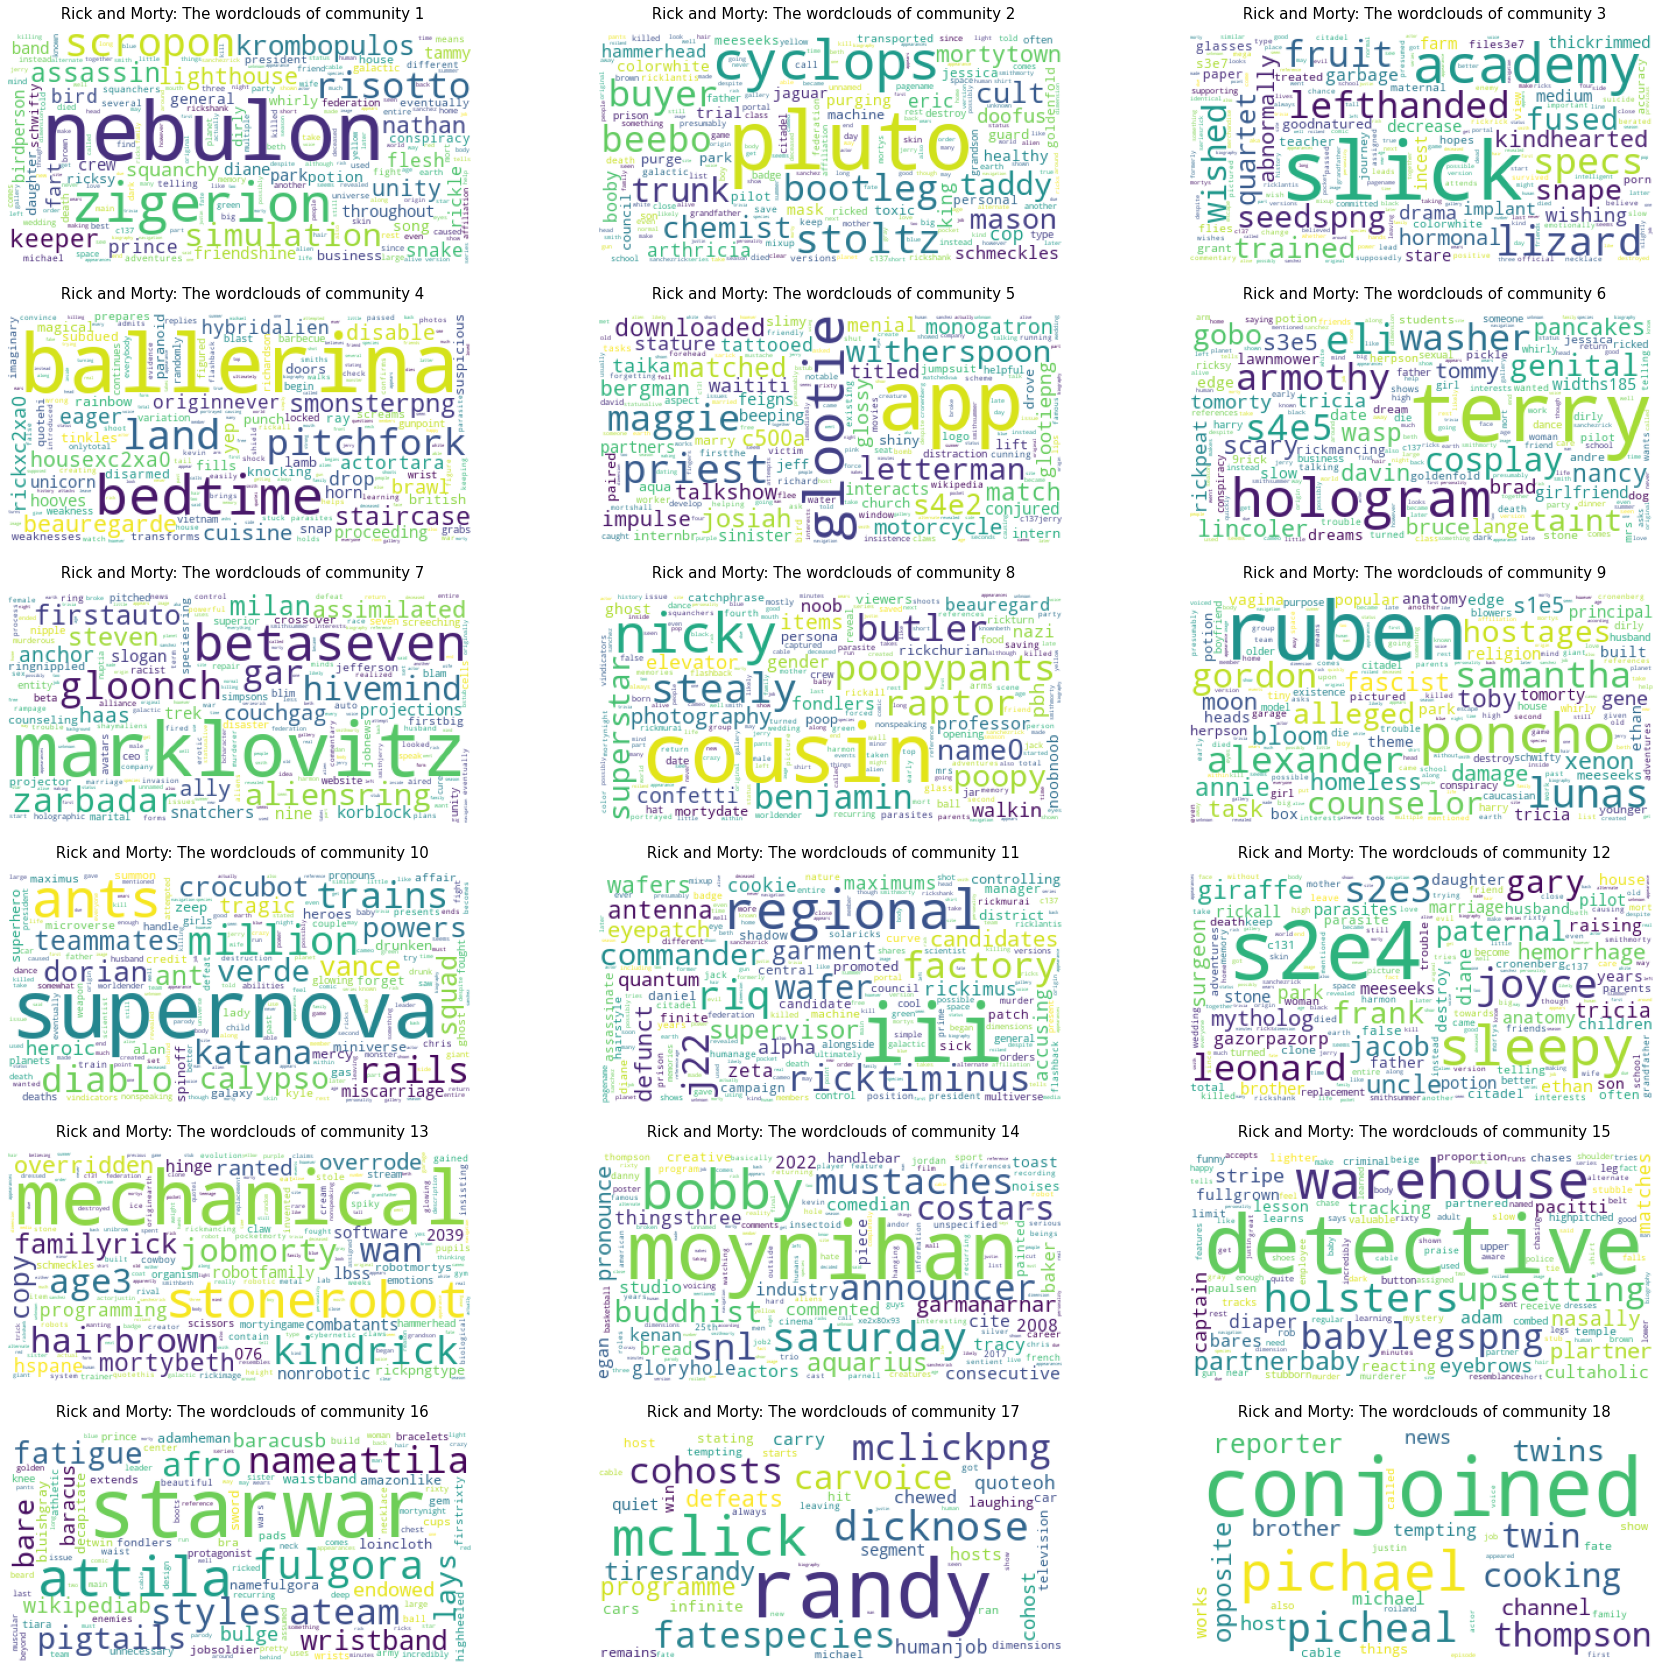

In [25]:
# Ploting
if len(Communities) >18:
  fig, axs = plt.subplots(nrows=7, ncols = 3, figsize = (30, 30))
  for i in range(len(Communities_sort)):
    wordcloud_ = WordCloud(background_color='white',max_font_size = 70)
    tf_idf_ = list(Communities_sort["TFIDF"])[i]
    wordcloud_.generate_from_frequencies(frequencies=tf_idf_) 
    if i <= 2:
      axs_x = 0
    elif 2 < i <= 5:
      axs_x = 1
    elif 5 < i <= 8:
      axs_x = 2
    elif 8 < i <= 11:
      axs_x = 3
    elif 11 < i <= 14:
      axs_x = 4
    elif 14 < i <= 17:
      axs_x = 5
    elif 17 < i <= 20:
      axs_x = 6

    if i in [i for i in range(30) if i % 3 == 0]:
      axs_y = 0
    elif (i - 1) in [i for i in range(30) if i % 3 == 0]:
      axs_y = 1
    elif (i - 2) in [i for i in range(30) if i % 3 == 0]:
      axs_y = 2
    axs[axs_x, axs_y].imshow(wordcloud_)
    title_ = ' Rick and Morty: The wordclouds of community {}'.format(i+1)
    axs[axs_x, axs_y].set_title(title_, fontsize = 15, pad=14)
    axs[axs_x, axs_y].axis("off")

else:
  fig, axs = plt.subplots(nrows=6, ncols = 3, figsize = (30, 30))
  for i in range(len(Communities_sort)):
    wordcloud_ = WordCloud(background_color='white',max_font_size = 70)
    tf_idf_ = list(Communities_sort["TFIDF"])[i]
    wordcloud_.generate_from_frequencies(frequencies=tf_idf_) 
    if i <= 2:
      axs_x = 0
    elif 2 < i <= 5:
      axs_x = 1
    elif 5 < i <= 8:
      axs_x = 2
    elif 8 < i <= 11:
      axs_x = 3
    elif 11 < i <= 14:
      axs_x = 4
    elif 14 < i <= 17:
      axs_x = 5

    if i in [i for i in range(30) if i % 3 == 0]:
      axs_y = 0
    elif (i - 1) in [i for i in range(30) if i % 3 == 0]:
      axs_y = 1
    elif (i - 2) in [i for i in range(30) if i % 3 == 0]:
      axs_y = 2
    axs[axs_x, axs_y].imshow(wordcloud_)
    title_ = ' Rick and Morty: The wordclouds of community {}'.format(i+1)
    axs[axs_x, axs_y].set_title(title_, fontsize = 15, pad=14)
    axs[axs_x, axs_y].axis("off")